# RECTANGULAR (kode setelah bimbingan)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/RECTANGULAR.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.001195,0.001793,0.000520,0.002409,0.001823,0.000805,0.000324,0.002341,0.001412,0.001758,...,1.207848e-03,0.001434,0.000743,0.000138,0.002514,0.001700,0.001067,0.000021,kejang,0.000000
1,0.000789,0.001850,0.000158,0.001468,0.001465,0.000763,0.000932,0.001564,0.001669,0.002435,...,1.892523e-03,0.001060,0.001257,0.000158,0.001869,0.000235,0.000710,0.000489,kejang,0.025000
2,0.002511,0.002253,0.000593,0.001467,0.003102,0.001204,0.000956,0.001171,0.000879,0.002853,...,3.548574e-03,0.000514,0.001964,0.000593,0.002037,0.000762,0.000705,0.001039,kejang,0.050000
3,0.003001,0.002348,0.001485,0.002485,0.004089,0.001443,0.000193,0.003235,0.001785,0.001719,...,1.484849e-02,0.001865,0.000861,0.001485,0.003279,0.003552,0.005105,0.000635,kejang,0.075000
4,0.001659,0.000911,0.001210,0.002071,0.000594,0.001194,0.000688,0.003625,0.001718,0.000732,...,7.476052e-03,0.001834,0.001406,0.001210,0.002151,0.005696,0.004143,0.001791,kejang,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807035,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.350920e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.926471
2807036,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.400107e-05,0.000017,0.000039,0.000038,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.941176
2807037,0.000061,0.000052,0.000018,0.000045,0.000042,0.000269,0.000277,0.000021,0.000050,0.000046,...,9.372227e-07,0.000027,0.000042,0.000018,0.000012,0.000184,0.000156,0.000063,tidak kejang,127.955882
2807038,0.000010,0.000024,0.000038,0.000010,0.000102,0.000322,0.000254,0.000002,0.000056,0.000010,...,1.399952e-05,0.000017,0.000039,0.000039,0.000033,0.000078,0.000116,0.000042,tidak kejang,127.970588


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)  # "kejang" -> 1, "tidak kejang" -> 0

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2245632, 23)

In [ ]:
X_test.shape

(561408, 23)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'max_depth': [5, 10, 20],
}


In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'mcc': 'matthews_corrcoef',
    'balanced_acc': 'balanced_accuracy',
    'logloss': 'neg_log_loss',
    'roc_auc': 'roc_auc'
}

In [ ]:
# GridSearchCV
grid_search = GridSearchCV(
    rf,
    param_grid=param_grid,
    scoring=scoring,
    cv=skf,
    refit='accuracy',   # pilih satu metrik untuk refit
    n_jobs=-1,
    return_train_score=True
)

In [ ]:
# Fit
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20]}, refit='accuracy',
             return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'balanced_acc': 'balanced_accuracy', 'f1': 'f1',
                      'logloss': 'neg_log_loss', 'mcc': 'matthews_corrcoef',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
resultss = results.T
print(resultss)

                               0            1            2
mean_fit_time         1488.95247  2826.168537  4617.170587
std_fit_time            12.22242    19.726912   393.721984
mean_score_time        10.122211    16.912553    38.612667
std_score_time          0.421551     0.159358     5.781513
param_max_depth                5           10           20
...                          ...          ...          ...
split2_train_roc_auc    0.712111     0.890255     0.974053
split3_train_roc_auc    0.710113     0.887067     0.972276
split4_train_roc_auc    0.710521     0.889999     0.973949
mean_train_roc_auc      0.710153     0.888754     0.973464
std_train_roc_auc       0.001149     0.001273     0.000645

[126 rows x 3 columns]


In [ ]:
resultss.to_csv('results banyak rectangular.csv')

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)[
    ['params', 'mean_test_accuracy', 'mean_test_precision',
     'mean_test_recall', 'mean_test_f1', 'mean_test_mcc', 'mean_test_balanced_acc',
     'mean_test_logloss', 'mean_test_roc_auc']
]
results

,params,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_test_mcc,mean_test_balanced_acc,mean_test_logloss,mean_test_roc_auc
0,{'max_depth': 5},0.663299,0.624399,0.819654,0.708826,0.343843,0.663299,-0.634502,0.709705
1,{'max_depth': 10},0.766282,0.697789,0.939453,0.800783,0.567703,0.766282,-0.514736,0.886360
2,{'max_depth': 20},0.857068,0.807542,0.937594,0.867720,0.723585,0.857068,-0.309322,0.951861


In [ ]:
# Hasil
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 20}
Best Score: 0.8570682991196372



📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

           0     0.9278    0.7748    0.8444    280704
           1     0.8067    0.9397    0.8681    280704

    accuracy                         0.8573    561408
   macro avg     0.8673    0.8573    0.8563    561408
weighted avg     0.8673    0.8573    0.8563    561408



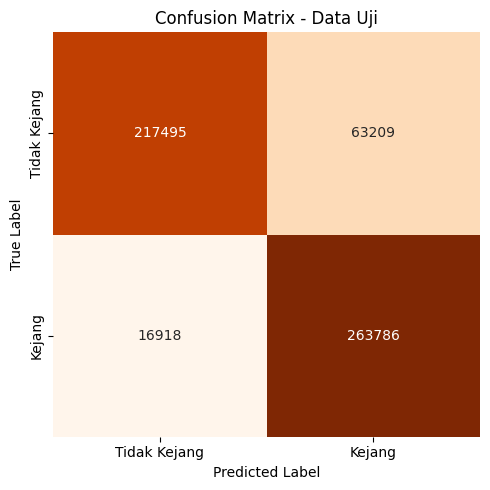

In [ ]:
#pediksi data test
y_test_pred = grid_search.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

           0     0.9721    0.8005    0.8780   1122816
           1     0.8305    0.9771    0.8978   1122816

    accuracy                         0.8888   2245632
   macro avg     0.9013    0.8888    0.8879   2245632
weighted avg     0.9013    0.8888    0.8879   2245632



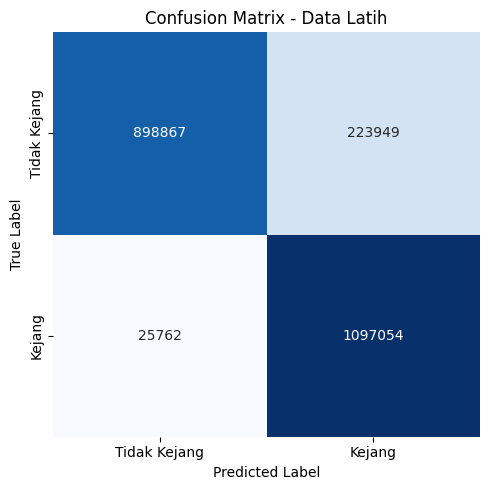

In [ ]:
# Prediksi data latih
y_train_pred = grid_search.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()

In [ ]:

# ====================
# 5. Feature Importance
# ====================
best_rf = grid_search.best_estimator_   # model terbaik hasil GridSearchCV
importances = best_rf.feature_importances_
feature_names = X.columns

# Buat DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n📊 Feature Importance:")
print(feat_imp)

# Visualisasi Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# RECTANGULAR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/fft_chb16_16.csv")
mydata

Mounted at /content/drive
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000759,0.000068,0.000240,0.000172,0.001114,0.000437,0.000072,0.000371,0.001558,0.000496,...,0.001002,0.001755,0.000117,0.000239,0.000267,0.000331,0.002075,0.000271,kejang,0.000000
1,0.000780,0.000078,0.000262,0.000178,0.001139,0.000473,0.000152,0.000375,0.001592,0.000505,...,0.001009,0.001789,0.000172,0.000260,0.000267,0.000447,0.002100,0.000291,kejang,0.166667
2,0.000862,0.000117,0.000322,0.000197,0.001220,0.000581,0.000295,0.000390,0.001714,0.000535,...,0.001031,0.001899,0.000294,0.000321,0.000272,0.000731,0.002181,0.000352,kejang,0.333333
3,0.001040,0.000214,0.000423,0.000234,0.001337,0.000771,0.000494,0.000420,0.001961,0.000588,...,0.001070,0.002129,0.000478,0.000422,0.000309,0.001192,0.002337,0.000464,kejang,0.500000
4,0.001808,0.000431,0.000981,0.000622,0.002003,0.001396,0.001006,0.000511,0.002896,0.000881,...,0.000959,0.003096,0.001038,0.000981,0.000420,0.002118,0.002624,0.001064,kejang,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.166667
1532,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000037,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.333333
1533,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.500000
1534,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000036,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.666667


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)  # "kejang" -> 1, "tidak kejang" -> 0

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1228, 23)

In [ ]:
X_test.shape

(308, 23)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}


In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'matthews_corrcoef':'matthews_corrcoef',
    'balanced_accuracy': 'balanced_accuracy',
    'neg_log_loss' :'neg_log_loss',
    'roc_auc' : 'roc_auc'
}

In [ ]:
# GridSearchCV
grid_search = GridSearchCV(
    rf,
    param_grid=param_grid,
    scoring=scoring,
    cv=skf,
    refit='accuracy',   # pilih satu metrik untuk refit
    n_jobs=-1,
    return_train_score=True
)

In [ ]:
# Fit
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20], 'n_estimators': [100]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy', 'f1': 'f1',
                      'matthews_corrcoef': 'matthews_corrcoef',
                      'neg_log_loss': 'neg_log_loss', 'precision': 'precision',
                      'recall': 'recall', 'roc_auc': 'roc_auc'})

In [ ]:
best_model = grid_search.best_estimator_
print(best_model)

RandomForestClassifier(max_depth=10, random_state=42)


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
print(results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.495232      0.015455         0.054505        0.005147   
1       0.639746      0.066049         0.059272        0.018070   
2       1.012836      0.184521         0.094058        0.024055   

   param_max_depth  param_n_estimators  \
0                5                 100   
1               10                 100   
2               20                 100   

                                   params  split0_test_accuracy  \
0   {'max_depth': 5, 'n_estimators': 100}              0.934959   
1  {'max_depth': 10, 'n_estimators': 100}              0.943089   
2  {'max_depth': 20, 'n_estimators': 100}              0.947154   

   split1_test_accuracy  split2_test_accuracy  ...  mean_test_roc_auc  \
0              0.934959              0.894309  ...           0.978700   
1              0.955285              0.922764  ...           0.984182   
2              0.959350              0.918699  ...           0.984515   



In [ ]:
# Hasil
results = pd.DataFrame(grid_search.cv_results_)[
    ['params', 'mean_test_accuracy', 'mean_test_precision',
     'mean_test_recall', 'mean_test_f1', 'matthews_corrcoef',
     'balanced_accuracy', 'neg_log_loss', 'roc_auc']
]
print(results)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


KeyError: "['matthews_corrcoef', 'balanced_accuracy', 'neg_log_loss', 'roc_auc'] not in index"

📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

           0     0.9951    0.9902    0.9927       614
           1     0.9903    0.9951    0.9927       614

    accuracy                         0.9927      1228
   macro avg     0.9927    0.9927    0.9927      1228
weighted avg     0.9927    0.9927    0.9927      1228



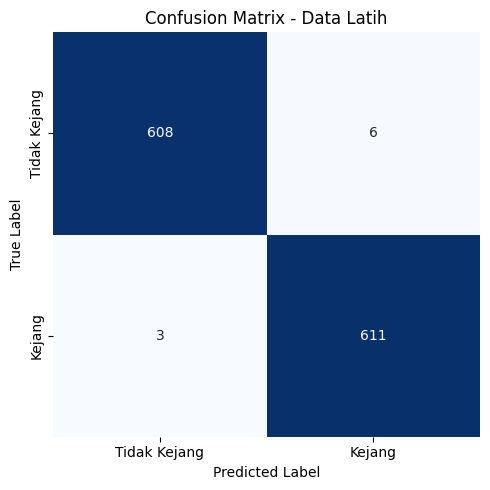

In [ ]:
# Prediksi data latih
y_train_pred = grid_search.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

           0     0.9367    0.9610    0.9487       154
           1     0.9600    0.9351    0.9474       154

    accuracy                         0.9481       308
   macro avg     0.9484    0.9481    0.9480       308
weighted avg     0.9484    0.9481    0.9480       308



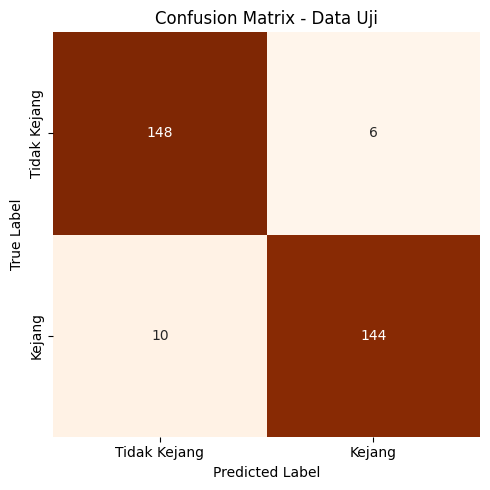

In [ ]:
#pediksi data test
y_test_pred = grid_search.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()

# RECTANGULAR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
mydata = pd.read_csv("/content/drive/MyDrive/TA/fft_chb16_16.csv")
mydata

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,seizure,frekuensi
0,0.000759,0.000068,0.000240,0.000172,0.001114,0.000437,0.000072,0.000371,0.001558,0.000496,...,0.001002,0.001755,0.000117,0.000239,0.000267,0.000331,0.002075,0.000271,kejang,0.000000
1,0.000780,0.000078,0.000262,0.000178,0.001139,0.000473,0.000152,0.000375,0.001592,0.000505,...,0.001009,0.001789,0.000172,0.000260,0.000267,0.000447,0.002100,0.000291,kejang,0.166667
2,0.000862,0.000117,0.000322,0.000197,0.001220,0.000581,0.000295,0.000390,0.001714,0.000535,...,0.001031,0.001899,0.000294,0.000321,0.000272,0.000731,0.002181,0.000352,kejang,0.333333
3,0.001040,0.000214,0.000423,0.000234,0.001337,0.000771,0.000494,0.000420,0.001961,0.000588,...,0.001070,0.002129,0.000478,0.000422,0.000309,0.001192,0.002337,0.000464,kejang,0.500000
4,0.001808,0.000431,0.000981,0.000622,0.002003,0.001396,0.001006,0.000511,0.002896,0.000881,...,0.000959,0.003096,0.001038,0.000981,0.000420,0.002118,0.002624,0.001064,kejang,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.166667
1532,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000037,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.333333
1533,0.000070,0.000030,0.000027,0.000005,0.000059,0.000005,0.000006,0.000019,0.000007,0.000026,...,0.000061,0.000009,0.000005,0.000027,0.000039,0.000073,0.000008,0.000015,tidak kejang,127.500000
1534,0.000052,0.000020,0.000029,0.000018,0.000020,0.000053,0.000019,0.000036,0.000025,0.000012,...,0.000048,0.000055,0.000006,0.000029,0.000004,0.000021,0.000007,0.000058,tidak kejang,127.666667


In [ ]:
# Pisahkan fitur (X) dan label (y)
X = mydata.drop(['frekuensi', 'seizure'], axis=1)
y = mydata['seizure']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)  # "kejang" -> 1, "tidak kejang" -> 0

In [ ]:
# split dataset train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1228, 23)

In [ ]:
X_test.shape

(308, 23)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi model/buat model dasar
rf = RandomForestClassifier(random_state=42)

# Ruang hyperparameter untuk Grid Search
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 20],
}


In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [ ]:
# GridSearchCV
grid_search = GridSearchCV(
    rf,
    param_grid=param_grid,
    scoring=scoring,
    cv=skf,
    refit='accuracy',   # pilih satu metrik untuk refit
    n_jobs=-1,
    return_train_score=True
)

In [ ]:
# Fit
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20], 'n_estimators': [100]},
             refit='accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [ ]:
best_model = grid_search.best_estimator_
print(best_model)

RandomForestClassifier(max_depth=10, random_state=42)


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
print(results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.479583      0.012806         0.026376        0.001419   
1       0.908108      0.189756         0.045004        0.006772   
2       0.924826      0.228246         0.038861        0.015892   

   param_max_depth  param_n_estimators  \
0                5                 100   
1               10                 100   
2               20                 100   

                                   params  split0_test_accuracy  \
0   {'max_depth': 5, 'n_estimators': 100}              0.934959   
1  {'max_depth': 10, 'n_estimators': 100}              0.943089   
2  {'max_depth': 20, 'n_estimators': 100}              0.947154   

   split1_test_accuracy  split2_test_accuracy  ...  mean_test_f1  std_test_f1  \
0              0.934959              0.894309  ...      0.912052     0.018651   
1              0.955285              0.922764  ...      0.929787     0.015935   
2              0.959350              0.918699  ...

In [ ]:
# Hasil
results = pd.DataFrame(grid_search.cv_results_)[
    ['params', 'mean_test_accuracy', 'mean_test_precision',
     'mean_test_recall', 'mean_test_f1']
]
print(results)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


                                   params  mean_test_accuracy  \
0   {'max_depth': 5, 'n_estimators': 100}            0.912029   
1  {'max_depth': 10, 'n_estimators': 100}            0.929942   
2  {'max_depth': 20, 'n_estimators': 100}            0.929939   

   mean_test_precision  mean_test_recall  mean_test_f1  
0             0.912578          0.912009      0.912052  
1             0.935722          0.925030      0.929787  
2             0.936724          0.923404      0.929629  
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.9299419279907084


📋 Classification Report - Data Latih:
              precision    recall  f1-score   support

           0     0.9951    0.9902    0.9927       614
           1     0.9903    0.9951    0.9927       614

    accuracy                         0.9927      1228
   macro avg     0.9927    0.9927    0.9927      1228
weighted avg     0.9927    0.9927    0.9927      1228



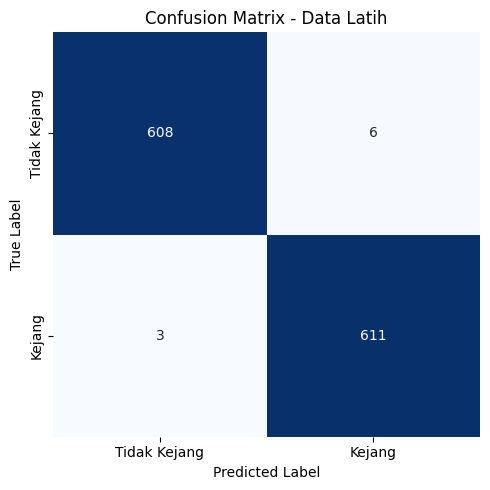

In [ ]:
# Prediksi data latih
y_train_pred = grid_search.predict(X_train) #menghasilakn label prediksi dari fitur

print("📋 Classification Report - Data Latih:")
print(classification_report(y_train, y_train_pred, digits=4)) # mengevaluasi seberapa baik prediksi dibanding label asli


# ====================
# Confusion Matrix - Data Latih
# ====================

cm_train = confusion_matrix(y_train, y_train_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Latih")
plt.tight_layout()
plt.show()


📋 Classification Report - Data Uji:
              precision    recall  f1-score   support

           0     0.9367    0.9610    0.9487       154
           1     0.9600    0.9351    0.9474       154

    accuracy                         0.9481       308
   macro avg     0.9484    0.9481    0.9480       308
weighted avg     0.9484    0.9481    0.9480       308



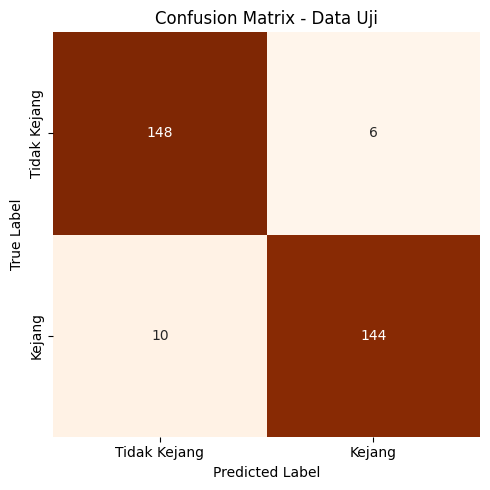

In [ ]:
#pediksi data test
y_test_pred = grid_search.predict(X_test)

# Akurasi data uji
print("\n📋 Classification Report - Data Uji:")
print(classification_report(y_test, y_test_pred, digits=4))

# ====================
# Confusion Matrix - Data Uji
# ====================

cm_test = confusion_matrix(y_test, y_test_pred)

# Visualisasi tanpa garis hitam
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Tidak Kejang', 'Kejang'],
            yticklabels=['Tidak Kejang', 'Kejang'],
            cbar=False)  # opsional: sembunyikan colorbar

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Data Uji")
plt.tight_layout()
plt.show()